# What is the Perfect Restaurant?

## Group Members


- A11701297 - Francis Anyim
- A13437410 - Yi Cai
- A13485887 - Qiuli Liu
- A13868208 - Mina Vukovic
- A09553590 - Kon Woo Lee

## Introduction and Background

A common activity that we all have at least once done is going to a restaurant. In the age of social media, smartphones, and instantaneous information sharing, it is a lot easier for people to discuss what they love and hate about their favorite restaurants whenever they want.

In particular we looked at 5-star restaurants and sought to understand what variables helped put these restaurants at the top.


## Research Question

What are the most dominant factors in determining the success of a restaurant?

## Background and Prior Work

This question is relevant because it pertains to the level of a business’s success in terms of how long it is open, what kind of reviews it receives, and other characteristics which combined can affect how popular it is. It is of interest because we want to create the “best” possible restaurant based on the data that we find, which is important from a business standpoint.
A related piece of work is a Kaggle competition where users had to predict a restaurant’s revenue. This is slightly similar to what we will attempt to do, where in that scenario they analysed data about restaurant location, its hours, etc, and then based on their analysis predicted how successful the restaurant would be. This relates to our project in that we too will look at similar factors, and then see how they relate to create the most successful business, which, depending on your point of view, may be the level of its revenue.


## Data Description

In order to answer our question, we yelp datasets from a recent kaggle competition and also took into consideration official data from the U.S census.

Datasets
We collected our yelp data from https://www.kaggle.com/yelp-dataset/yelp-dataset/data.
From this we were able to get a list of businesses from yelp (as well as their location), a list of open hours for these business, a list of relevant users pertaining to the businesses, and their comments on their experience through tips and reviews that they left behind.
We also went to census.gov in order to collect information about the areas we were looking at in order to further understand our focus businesses and the environments they were in. We also got information about the foreign population as well as the amount population with a bachelor’s degree.


Population data for all cities inside UK:
http://worldpopulationreview.com/countries/united-kingdom-population/cities/
Population data for all cities inside Canada:
http://worldpopulationreview.com/countries/canada-population/cities/
Population data for all cities inside US:
https://www.census.gov/data/tables/2016/demo/popest/total-cities-and-towns.html#tables




### Below are the description of each of our datasets

1.**yelp_business.csv**:

Business.csv contains basic information about the businesses we are going to be inspecting. Each business has a unique ‘business_id’ which is what will be used to reference the business in our other csv files. Along with the business name, the file includes data for its location (‘address’, ‘neighborhood’, ‘city’, ‘state’, ‘postal_code’, ‘latitude’, ‘longitude’) that will be used to narrow down our region. The .csv also contains ‘stars’ and ‘review_count’ which will help us refine our search to the top rated and most reviewed businesses. Finally, it contains ‘is_open’ and ‘categories’. ‘Is_open’ is a binary value (0 or 1) to indicate if the business is open or closed and ‘categories’ contains a list of words that describe the type of business and the services they offer. Of the data in this dataset, we will probably disregard ‘neighborhood’

	

2.**yelp_review.csv**:

This file simply contains a massive number of yelp reviews pertaining to the businesses. Each review has its own id, an id for the user, an id for the business reviewed, and a string of text which constitutes the actual written review. There are also columns for the date the review was written, the number of stars the reviewer gave the business, and a scale rating for how useful, funny, or cool the review was. We can see which businesses from the business.csv was reviewed as well as get an average score from this data. Using the text column we can potentially parse for buzz words which appear the most and see if those words are used more on highly reviewed or poorly reviewed places. 


3.**yelp_tip.csv**:

In addition to the reviews, the yelp_tip.csv includes shorter, more specific tips that the users give to each other related to the business. Through these tips, one or more particular features of the business are revealed such as when the happy hours are, how is the parking near the business, is there a dress code and so on. They include more than just the users' feeling and comments about the business as recorded in the yelp_review.csv in a way that describe what the customers need to be aware of before going to the businesses. The dataset is consisted of tip texts with their corresponding business id and user id. 


4.**yelp_business_hours.csv**:

The dataset yelp_business_hours.csv contains all of the working hours of every restaurant examined, from Monday through Sunday. It also contains the unique business ID of each entry associated with the open hours. There are also multiple entries which contain “none” in all of the days, implying that the restaurants were closed those days. Hours are listed in the format XX:0 – XX:0, for some example XX hour. This particular dataset will help us determine what are the prime hours of business for a restaurant to be open.


5.**yelp_user.csv**:

This file contains multiple columns that describe users from different aspects. Each user has a unique user id, which is a combination of numbers, characters and symbols. And it also has the names of the users, how many reviews they have written, when did they register their yelp account, their friends’ id and the average that they give. Although this file has columns of different types of compliments for each user, I don’t think it’s going to be very useful for us. Among those columns, ‘user_id’, ‘name’, ‘friends’ and ‘elite’  are Strings; ‘yelp_since’ is DateTime; and the rest columns are Numeric.


## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment=None

Reading the CSVs into **DataFrames**

In [2]:
# Read yelp_tip.csv dataset
df_tip = pd.read_csv("yelp_tip.csv")

In [3]:
# Read yelp_business.csv dataset
df_business = pd.read_csv('yelp_business.csv')

In [4]:
# Read yelp_user.csv dataset
df_users = pd.read_csv('yelp_user.csv')

In [5]:
# Read yelp_review.csv dataset
df_review = pd.read_csv('yelp_review.csv')

Filtering all of the **businesses** in the dataframe to show us only **restaurants**.

In [6]:
# Filter business df by keeping all that are over 4 stars with more than 50 reviews
df_businessNeed = df_business[(df_business['stars'] >= 4.0) & (df_business['review_count'] > 50)]

# Delete the index column
df_businessNeed.reset_index(inplace=True)
del df_businessNeed['index']

# To limit our search to just Restaurants:
# Loop through each row and get the categories column value (a string)
# For each category, check if the word 'Restaurant' or 'food' is in there and if not, drop that entire line in top_bs
count = 0;
for ind, row in df_businessNeed.iterrows():
    if (('Restaurants' in row['categories']) or ('Food' in row['categories'])):
        count = count + 1
    else:
        count = count
        df_businessNeed.drop(ind, inplace = True)
        
        
# Drop unnecessary columns neighborhood and postal code. And categories since we've used it
df_businessNeed.drop(['neighborhood','postal_code', 'categories'], axis = 1, inplace = True)

# Save the business we need to a new csv file for future use
df_businessNeed.to_csv('businessFinal.csv', sep='\t')

In [7]:
# This is the final filtered version of business df
df_businessFinal = pd.read_csv("businessFinal.csv", sep='\t', encoding="ISO-8859-1")
df_businessFinal.head()

,Unnamed: 0,business_id,name,address,city,state,latitude,longitude,stars,review_count,is_open
0,1,FXHfcFVEfI1vVngW2gVOpw,"""Bampot House of Tea & Board Games""","""201 Harbord Street""",Toronto,ON,43.661582,-79.408878,4.0,55,1
1,4,5q6Xh-UcJa78bp6dzyaE7w,"""Duck Donuts""","""1710 Kenilworth Ave, Ste 220""",Charlotte,NC,35.202624,-80.844419,4.5,373,1
2,5,W1Yr6c2XDx_RBjb6WsV-aQ,"""Divine Cafe at the Springs Preserve""","""333 S Valley View Blvd""",Las Vegas,NV,36.170706,-115.190288,4.0,140,1
3,6,PJ-VbAtIOso1dqd2frQqqg,"""Donut Tyme""","""4268 E Charleston Blvd""",Las Vegas,NV,36.159328,-115.082179,4.5,76,1
4,7,mLP-jIIRdoaYM7fJqqFurw,"""Napoli Pizzeria""","""2006 Murray Ave""",Pittsburgh,PA,40.434399,-79.922983,4.0,53,1


Filtering the **reviews** and **tips** dataframes to show relevant data for our pursuits. We are dropping the columns that stated if a review was 'useful', 'funny', or 'cool' and the 'date' it was posted, mainly because there was a lot of missing data and it wasn't absolutely necessary.

In [8]:
# Drop columns that are not useful for df_review
df_review.drop(['useful', 'funny', 'cool', 'date'], axis = 1, inplace = True)

# Drop date column for df_tip
df_tip = df_tip.drop(['date'], axis = 1)

Filtering the **users** dataframe which had a lot of unncessesary data. 

In [9]:
# Dropping all the columns we don't need.
df_users = df_users.drop(['name', 'yelping_since','friends','useful','funny','cool','fans','compliment_hot','compliment_more',
                          'compliment_profile','compliment_cute','compliment_list','compliment_note','compliment_plain','compliment_cool'
                         ,'compliment_funny','compliment_writer','compliment_photos'],axis = 1)

# Keep all the users whose write more than 100 reviews.
df_users = df_users[df_users['review_count'] >= 100]

# Drop all none elite users
df_users = df_users[df_users.elite.str.contains("None") == False]

Now we merge the **business** and **reviews** columns based on the mutual column *business_id*, to form one new dataframe. 

We also merge **businesses** and **tips** based on the *business_id* as well.

The purpose of doing so is to filter out reviews and tips that are **not related to restaurant businesses**. 

In [10]:
# Merge business and reviews on their business_id
df_review_business = pd.merge(df_review, df_businessFinal, on = "business_id", how='outer')

# Drop all rows with NaN
df_review_business = df_review_business.dropna(axis=0, how='any')
df_review_business.head()



# Merge business and tips on their business_id
df_tip_business = pd.merge(df_tip, df_businessFinal, on = "business_id", how='outer')

# Drop all rows with NaN
df_tip_business = df_tip_business.dropna(axis=0, how='any')
df_tip_business.head()

,text,likes,business_id,user_id,Unnamed: 0,name,address,city,state,latitude,longitude,stars,review_count,is_open
77,Homemade pasta is the best in the area,0.0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ,9828.0,"""Tillie's Restaurant & Chantillie Lounge""","""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0,58.0,1.0
78,"Excellent service, staff is dressed profession...",0.0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ,9828.0,"""Tillie's Restaurant & Chantillie Lounge""","""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0,58.0,1.0
79,Ordered a fish sandwich carry out. It was deli...,0.0,k7WRPbDd7rztjHcGGkEjlw,RaqaRvK2VEnh2SWipHZs9Q,9828.0,"""Tillie's Restaurant & Chantillie Lounge""","""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0,58.0,1.0
80,Could go for some Lasagna! Excellent!,0.0,k7WRPbDd7rztjHcGGkEjlw,WBgCnzfOCA02JcYTp6APyg,9828.0,"""Tillie's Restaurant & Chantillie Lounge""","""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0,58.0,1.0
81,Eat a delicious dinner and order a pizza to ta...,0.0,k7WRPbDd7rztjHcGGkEjlw,igVuIqd3nstyjWunAr3d2A,9828.0,"""Tillie's Restaurant & Chantillie Lounge""","""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0,58.0,1.0


We also merge **users** and **reviews** based on the common *user_ids*. Each user has a unique ID which can be seen for each review.

The purpose of this is to filter out the reviews and tips written by **unreliable users** which is defined earlier in the user data cleaning (any user that are not yelp elite and has less than 100 reviews are filtered out)

In [11]:
# Merge business and users on their user_id
df_review_users = pd.merge(df_review_business, df_users, on = "user_id", how='outer')

# Drop all rows with NaN
df_review_users = df_review_users.dropna(axis=0, how='any')
df_review_users.head()

# Drop any unnecessary columns in the df review users
df_review_users = df_review_users.drop(['Unnamed: 0', 'review_id', 'name', 'review_count_x', 'review_count_y', 'is_open', 'average_stars', 'elite'], axis=1)
df_review_users.head()

# Reset the index
df_review_users.reset_index()

,index,user_id,business_id,stars_x,text,address,city,state,latitude,longitude,stars_y
0,3,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5.0,*The shop was featured on Mind of a Chef with ...,"""34 Avenue Fairmount Ouest""",Montréal,QC,45.523333,-73.594859,4.0
1,4,xYciRtVZ1PW4IxSX4oJ1aw,s2I_Ni76bjJNK9yG60iD-Q,3.0,"3.5\/5\n\n*Don't go for brunch, go for the pas...","""355 Place Royale""",Montréal,QC,45.503544,-73.554469,4.5
2,5,xYciRtVZ1PW4IxSX4oJ1aw,0W4lkclzZThpx3V65bVgig,4.0,*Schwartz's has become a Montreal's famous lan...,"""3895 Boulevard Saint-Laurent""",Montréal,QC,45.516373,-73.577537,4.0
3,6,xYciRtVZ1PW4IxSX4oJ1aw,TR0-w6VoZDAdvFQiq7P2Ug,5.0,Millie Creperie is a hidden gem tucked away in...,"""161 Baldwin Street""",Toronto,ON,43.654949,-79.399671,4.0
4,7,xYciRtVZ1PW4IxSX4oJ1aw,e41TP5cXZqSrz50xCBJqZw,5.0,It was Insomnia that introduced me to the word...,"""563 Bloor Street W""",Toronto,ON,43.665131,-79.410852,4.0
5,8,xYciRtVZ1PW4IxSX4oJ1aw,crstB-H5rOfbXhV8pX0e6g,4.0,*Opened by the same owners as Kingyo Izakaya. ...,"""421 College Street""",Toronto,ON,43.656458,-79.406981,4.5
6,9,xYciRtVZ1PW4IxSX4oJ1aw,ejKXczjEkm1gzyRdblQm8w,3.0,This is the first time for me to eat a Vegetar...,"""147 Spadina Avenue""",Toronto,ON,43.648068,-79.395629,4.0
7,10,xYciRtVZ1PW4IxSX4oJ1aw,cQK9M2JAwETQnnBoYyua5A,1.0,*the tables and seats were dirty and greasy. Y...,"""249 Victoria Street""",Toronto,ON,43.655737,-79.379002,4.0
8,11,xYciRtVZ1PW4IxSX4oJ1aw,6EVBc9kdc3Hd8KZkLVPnGA,4.0,"You know, I can't believe I'm actually reviewi...","""384 Yonge Street, Unit 51""",Toronto,ON,43.659238,-79.382903,4.5
9,12,xYciRtVZ1PW4IxSX4oJ1aw,Bf2fuqWbHd3L-X69FSMvmg,3.0,*restaurant was tiny and at best it can sit ar...,"""277 Augusta Ave""",Toronto,ON,43.655915,-79.402315,4.0


Here we merge the **reviews** and **tips** dataframes based on *user_id*.

In [12]:
# Merge business and tips on their business_id
df_tip_user = pd.merge(df_tip, df_businessFinal, on = "business_id", how='outer')

# Drop all rows with NaN
df_tip_user = df_tip_business.dropna(axis=0, how='any')
df_tip_user.head()

# Drop any unnecessary columns in df tip user
df_tip_user = df_tip_user.drop(['Unnamed: 0', 'likes', 'name', 'review_count', 'is_open'], axis=1)
df_tip_user.head()

# Reset the index 
df_tip_user.reset_index()

,index,text,business_id,user_id,address,city,state,latitude,longitude,stars
0,77,Homemade pasta is the best in the area,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ,"""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0
1,78,"Excellent service, staff is dressed profession...",k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ,"""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0
2,79,Ordered a fish sandwich carry out. It was deli...,k7WRPbDd7rztjHcGGkEjlw,RaqaRvK2VEnh2SWipHZs9Q,"""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0
3,80,Could go for some Lasagna! Excellent!,k7WRPbDd7rztjHcGGkEjlw,WBgCnzfOCA02JcYTp6APyg,"""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0
4,81,Eat a delicious dinner and order a pizza to ta...,k7WRPbDd7rztjHcGGkEjlw,igVuIqd3nstyjWunAr3d2A,"""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0
5,82,Very traditional Italian food. Delicious!,k7WRPbDd7rztjHcGGkEjlw,0GHmCNC5DG3Z16R2H-bVLQ,"""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0
6,83,Loved it!,k7WRPbDd7rztjHcGGkEjlw,suRd6rt0E8TMz5Dv5G4SxQ,"""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0
7,84,Love this place try the cheese ravioli good se...,k7WRPbDd7rztjHcGGkEjlw,w4dcWDJ6KXv7fp8s-jhnXg,"""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0
8,85,The Veal Parmesan and homemade pasta is fantas...,k7WRPbDd7rztjHcGGkEjlw,PQmKbmxFNnmODEPPkXml-g,"""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0
9,86,"Best Italian food in McKeesport,cheap ,great s...",k7WRPbDd7rztjHcGGkEjlw,itm_AZHE3RtU5GgyayGpyg,"""308 36th St""",McKeesport,PA,40.327975,-79.839877,4.0


Now we merge **reviews** and **tips** with their user matched, and start finalising our dataframe.

In [13]:
# Merge review user and tip user
df_Final = pd.merge(df_review_users, df_tip_user, on = "business_id", how='outer')

# Drop any row with NaN value
df_Final = df_Final.dropna(axis=0, how='any')

In the final cleaning process, we decided to drop all restaurants **below 5 stars** because our goal is to find the features that determine the best restaurant. We also decided to drop the tip column for a cleaner dataframe. 

In [14]:
# Drop any unnecessary columns in final df
df_Final = df_Final.drop(['user_id_x', 'user_id_y', 'city_y', 'state_y', 'latitude_y', 'longitude_y', 'stars', 'stars_y', 'address_y'], axis=1)

# We decide to drop tips for now for a clearer dataframe
df_Final = df_Final.drop(['text_y'], axis=1)
df_Final = df_Final.drop_duplicates()

In [15]:
# Only keep the restaurants that are 5-star
df_Final = df_Final[df_Final['stars_x'] == 5.0]
df_Final.head()

,business_id,stars_x,text_x,address_x,city_x,state_x,latitude_x,longitude_x
0,AEx2SYEUJmTxVVB18LlCwA,5.0,*The shop was featured on Mind of a Chef with ...,"""34 Avenue Fairmount Ouest""",Montréal,QC,45.523333,-73.594859
16,AEx2SYEUJmTxVVB18LlCwA,5.0,Get the special with swiss along with a chocol...,"""34 Avenue Fairmount Ouest""",Montréal,QC,45.523333,-73.594859
32,AEx2SYEUJmTxVVB18LlCwA,5.0,This is a great little spot for a quick light ...,"""34 Avenue Fairmount Ouest""",Montréal,QC,45.523333,-73.594859
112,AEx2SYEUJmTxVVB18LlCwA,5.0,I love this Montreal staple... It appears to b...,"""34 Avenue Fairmount Ouest""",Montréal,QC,45.523333,-73.594859
160,AEx2SYEUJmTxVVB18LlCwA,5.0,I couldn't believe how much I loved this sandw...,"""34 Avenue Fairmount Ouest""",Montréal,QC,45.523333,-73.594859


In [16]:
# Read the business hour csv file
df_hours = pd.read_csv('yelp_business_hours.csv')

In [17]:
# Reset Final's index
df_Final.reset_index()

# Merge Final and hours based on their business_id
df_Final = pd.merge(df_Final, df_hours, on = 'business_id', how = 'outer')

# Drop any row with NaN values
df_Final = df_Final.dropna(axis=0, how='any')

We save the final cleaned dataset to a df_Final.csv file for future use.

In [18]:
# Reset the index to business_id
df_Final.set_index('business_id')

# extract the Final dataframe to a csv file
df_Final.to_csv('df_Final.csv', sep='\t')

df_Final = pd.read_csv('df_Final.csv', sep='\t', encoding="ISO-8859-1")

In [19]:
df_Final.reset_index()

var = df_Final['business_id'].nunique()
# print(var)

df_Final = df_Final.groupby('business_id').agg({'stars_x':'first', 'text_x': ', '.join, 'address_x':'first', 'city_x':'first', 'state_x':'first', 'latitude_x':'first', 'longitude_x':'first', 'monday':'first', 'tuesday':'first', 'wednesday':'first', 'thursday':'first', 'friday':'first', 'saturday':'first', 'sunday':'first',}).reset_index()

df_Final.set_index('business_id')

,stars_x,text_x,address_x,city_x,state_x,latitude_x,longitude_x,monday,tuesday,wednesday,thursday,friday,saturday,sunday
business_id,,,,,,,,,,,,,,
--9e1ONYQuAa-CB_Rrw7Tw,5.0,There's a reason why Emeril Lagasse is such a ...,"""3355 Las Vegas Blvd S""",Las Vegas,NV,36.123183,-115.169190,11:30-14:0,11:30-14:0,11:30-14:0,11:30-14:0,11:30-14:0,11:30-14:0,11:30-14:0
--cZ6Hhc9F7VkKXxHMVZSQ,5.0,"Listen, I could write all kinds of words and t...","""1408 E Blvd""",Charlotte,NC,35.199853,-80.844820,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,12:0-21:0
-050d_XIor1NpCuWkbIVaQ,5.0,Love this spot - it's pretty close to the conv...,"""801 N 1st St""",Phoenix,AZ,33.456696,-112.072327,None,14:30-6:30,14:30-6:30,14:30-6:30,14:30-6:30,14:30-6:30,None
-1VaIJza42Hjev6ukacCNg,5.0,"The Surprise location is our normal stop, and ...","""12245 W Santa Fe Dr""",El Mirage,AZ,33.617436,-112.324297,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-21:0,11:0-21:0,9:0-16:0
-1xuC540Nycht_iWFeJ-dw,5.0,"Excellent poulet, mais les frites étaient un p...","""115 Rue Rachel E""",Montréal,QC,45.519310,-73.580749,6:30-21:0,6:30-21:0,6:30-21:0,6:30-22:0,6:30-22:0,6:30-22:0,6:30-21:0
-3oxnPPPU3YoxO9M1I2idg,5.0,My boyfriend and I had heard about Eklectic Pi...,"""1859 S Stapley Dr, Ste 105-3""",Mesa,AZ,33.379912,-111.806297,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-21:0
-3zffZUHoY8bQjGfPSoBKQ,5.0,Our first fancy shmancy dinner in Vegas was at...,"""3600 S Las Vegas Blvd""",Las Vegas,NV,36.111990,-115.177001,17:30-22:0,17:30-22:0,17:30-22:0,17:30-22:0,17:30-22:0,17:30-22:0,17:30-22:0
-4TMQnQJW1yd6NqGRDvAeA,5.0,Chocolate wrapped in velvet rolled up in a Sin...,"""6936 E Main St""",Scottsdale,AZ,33.493364,-111.931241,16:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,17:0-22:0,11:0-15:0
-5NXoZeGBdx3Bdk70tuyCw,5.0,REALLY love this place!!!!!!!!!!!!!!!!!!!!!!! ...,"""202 E University Ave, Ste C""",Urbana,IL,40.117695,-88.205874,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-21:0,11:0-20:0,11:0-20:0


In [20]:
df_Final = df_Final.drop(['stars_x', 'address_x'], axis = 1)

df_Final.columns = ['business_id', 'reviews', 'city', 'state', 'latitude', 'longitude', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']

df_Final.head()

,business_id,reviews,city,state,latitude,longitude,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,--9e1ONYQuAa-CB_Rrw7Tw,There's a reason why Emeril Lagasse is such a ...,Las Vegas,NV,36.123183,-115.169190,11:30-14:0,11:30-14:0,11:30-14:0,11:30-14:0,11:30-14:0,11:30-14:0,11:30-14:0
1,--cZ6Hhc9F7VkKXxHMVZSQ,"Listen, I could write all kinds of words and t...",Charlotte,NC,35.199853,-80.844820,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,12:0-21:0
2,-050d_XIor1NpCuWkbIVaQ,Love this spot - it's pretty close to the conv...,Phoenix,AZ,33.456696,-112.072327,None,14:30-6:30,14:30-6:30,14:30-6:30,14:30-6:30,14:30-6:30,None
3,-1VaIJza42Hjev6ukacCNg,"The Surprise location is our normal stop, and ...",El Mirage,AZ,33.617436,-112.324297,11:0-20:0,11:0-20:0,11:0-20:0,11:0-20:0,11:0-21:0,11:0-21:0,9:0-16:0
4,-1xuC540Nycht_iWFeJ-dw,"Excellent poulet, mais les frites étaient un p...",Montréal,QC,45.519310,-73.580749,6:30-21:0,6:30-21:0,6:30-21:0,6:30-22:0,6:30-22:0,6:30-22:0,6:30-21:0


For future data analysis use, we extract the business ids with only their location information attached into a new csv file **df_Final_BusinessID2.csv**. 

In [21]:
df_Final.to_csv('df_Final.csv', sep='\t')

# read the final csv file into the potential new business id dataframe
df_Final_BusinessID = pd.read_csv('df_Final.csv', sep='\t', encoding="ISO-8859-1")
 
# keep only the information of businesses' location in the new business id dataframe
df_Final_BusinessID = df_Final_BusinessID.drop(['reviews', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday'], axis=1)

In [22]:
df_Final_BusinessID.to_csv('df_Final_BusinessID.csv', sep='\t')

df_Final_BusinessID2 = pd.read_csv('df_Final_BusinessID.csv', sep='\t', encoding="ISO-8859-1")

df_Business2 = pd.read_csv('yelp_business.csv')

# add more information such as name and review count to the new business id dataframe.
df_Business2 = df_Business2.drop(['neighborhood', 'address', 'postal_code', 'stars', 'is_open', 'categories'], axis=1)

In [23]:
df_Final_BusinessID2 = pd.merge(df_Final_BusinessID2, df_Business2, on = "business_id", how='outer')

df_Final_BusinessID2 = df_Final_BusinessID2.dropna(axis=0, how='any')

df_Final_BusinessID2 = df_Final_BusinessID2.drop(['city_y', 'state_y', 'latitude_y', 'longitude_y'], axis=1)

In [24]:
df_Final_BusinessID2.columns = ['unnamed1', 'unnamed2', 'business_id', 'city', 'state', 'latitude', 'longitude', 'name', 'review_count']

df_Final_BusinessID2 = df_Final_BusinessID2.drop(['unnamed1', 'unnamed2'], axis=1)

# convert the new business id dataframe into the csv file we want
df_Final_BusinessID2.to_csv('df_Final_BusinessID2.csv', sep='\t')

## Data Visualisations

Here we will visualise the business hours of each restaurant and geographical location of each highly rated restaurant.

In [25]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from wordcloud import WordCloud, STOPWORDS

### Business Hours

In [26]:
# Get businesses which have more than 50 reviews
businesses = pd.read_csv('yelp_business.csv')
top_bs = businesses[(businesses['review_count'] > 50)]
top_bs.reset_index(inplace=True)
del top_bs['index']


# To limit our search to just Restaurants:
# Loop through each row and get the categories column value (a string)
# For each category, check if the word 'Restaurant' is in there and if not, drop that entire line in top_bs
count = 0;
for ind, row in top_bs.iterrows():
    if (('Restaurants' in row['categories']) or ('Food' in row['categories'])):
        count = count + 1
    else:
        count = count
        top_bs.drop(ind, inplace = True)

# Drop unnecessary columns neighborhood and postal code.
top_bs.drop(['neighborhood','postal_code'], axis = 1, inplace = True)

In [27]:
# Read the csv file
hours = pd.read_csv('yelp_business_hours.csv')
hours.head(n=20)

,business_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0
5,o9eMRCWt5PkpLDE0gOPtcQ,18:0-0:0,18:0-0:0,18:0-0:0,18:0-0:0,18:0-0:0,18:0-0:0,None
6,kCoE3jvEtg6UVz5SOD3GVw,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,None,None
7,OD2hnuuTJI9uotcKycxg1A,11:0-19:0,11:0-19:0,11:0-19:0,11:0-19:0,11:0-19:0,10:0-18:0,11:0-16:0
8,EsMcGiZaQuG1OOvL9iUFug,None,None,None,None,None,None,None
9,TGWhGNusxyMaA4kQVBNeew,9:0-18:0,9:0-18:0,9:0-18:0,9:0-18:0,9:0-18:0,9:0-18:0,9:0-18:0


Here we filter the data from the dataframe of business hours per weekday, to calculate the average amount of hours a business was open on a given day.

In [28]:
# This method takes two parameters, which are star of the restaurant and the specific weekday.
# first it gets business hours of the restaurants which satisfy the condition of top_bs.
# Then it changes all the business time from strings into numbers and drops all the none values.
# And it calculates and returns the mean of total business hours.
def average(star, weekday):
    top_bs.reset_index(drop = True, inplace = True)
    df_hours = pd.merge(top_bs , hours , on = 'business_id', how= 'outer')
    df_hours.dropna()
    df_hours = df_hours[df_hours['stars'] == star ]
    df_hours = df_hours.drop(['name', 'address','city','state','latitude','longitude','review_count','is_open','categories'], axis = 1)

    df_hours = pd.Series(df_hours[weekday])
    df_hours = df_hours.str.replace(':', '.')
    df_hours = df_hours[df_hours!= 'None']
    df_hours = df_hours.str.replace('30', '5')
    df_hours = df_hours.str.split('-')
    df_hours = df_hours.dropna()

    df_hours.reset_index(drop= True, inplace = True)
    new_list = []
    for item in df_hours:
        new_list.append([float(i) for i in item])


    new_col = []
    for i in range(0,len(new_list)):
        if new_list[i][1]> new_list[i][0]:
            new_col.append(new_list[i][1] - new_list[i][0]) 
        if new_list[i][1]< new_list[i][0]:
            diff = 24 - new_list[i][0] + new_list[i][1]
            new_col.append(diff)
    return(np.mean(new_col))

In [29]:
# This function takes one parameter which is the star of restuarant.
# It creates a dataframe and put all the average hour of each weekday into the dataframe. Then return that dataframe.
def makeDataFrame(star):
    mon = average(star, 'monday')
    tue = average(star,'tuesday')
    wed = average(star,'wednesday')
    thur = average(star, 'thursday')
    fri = average(star, 'friday')
    sat = average(star,'saturday')
    sun = average(star,'sunday')
    df_star = {'monday': [mon],
               'tuesday':[tue],
               'wednesday':[wed],
               'thursday': [thur],
               'friday':[fri],
               'saturday':[sat],
               'sunday':[sun]}
    df_star=pd.DataFrame(data = df_star)
    df_star = df_star[['monday','tuesday','wednesday','thursday','friday','saturday','sunday']]
    return df_star

In [30]:
# Getting average business hours of resturants of each weekday with corresponding star.
one_star = makeDataFrame(1)
two_star = makeDataFrame(2)
three_star = makeDataFrame(3)
four_star = makeDataFrame(4)
five_star = makeDataFrame(5)

In [31]:
# Merging them into one dataframe.
df_FinalHour= one_star.merge(two_star, how='outer').merge(three_star, how='outer').merge(four_star, how='outer').merge(five_star,how='outer')
df_FinalHour.index = np.arange(1,len(df_FinalHour)+1)
df_FinalHour

,monday,tuesday,wednesday,thursday,friday,saturday,sunday
1,15.000000,15.000000,15.000000,15.000000,15.000000,11.000000,9.000000
2,13.020887,13.072720,13.036429,13.215000,13.857857,13.791048,12.900750
3,11.661624,11.582762,11.613489,11.707117,12.380832,12.416876,11.456039
4,10.307879,10.152299,10.147310,10.224208,10.734263,10.704448,9.808464
5,9.677419,9.386134,9.288211,9.331557,9.721311,9.461207,8.428571


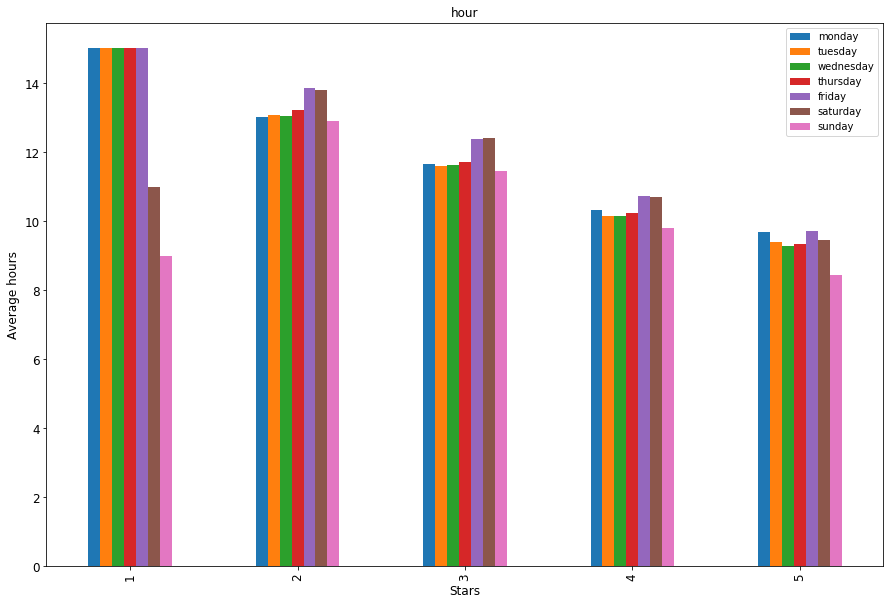

In [32]:
# Visualization
import matplotlib.pyplot as plt

ax = df_FinalHour[['monday','tuesday','wednesday','thursday','friday','saturday','sunday']].plot(kind = 'bar', title = 'hour',
                                                                                                 figsize = (15,10), legend= True,
                                                                                                 fontsize=12)
ax.set_xlabel('Stars', fontsize = 12)
ax.set_ylabel('Average hours', fontsize = 12)
plt.show()

The bar chart above shows average business hours of each day and each star. Stars are somehow related to business hours. So the ideal average business hours would be around 10 hours from Monday to Saturday and 9 hours on Sunday. Business hours on Friday and Saturday should be a little longer that other days.

## Word Cloud

In this part we are trying to find the most common words or phrases that appear in the reviews of five star restaurants to see if we can find any determining features or words that relate to the success of the restaurants.

In [33]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from wordcloud import WordCloud

df = pd.read_csv('df_Final.csv', sep = '\t', encoding = 'ISO-8859-1')

In [34]:
list_of_words = []
# Convert column to just strings
df['reviews'] = df['reviews'].astype(str)

# Removing Quotations from Restaurant Name
df['reviews'] = [i.replace('"', '') for i in df['reviews']]

In [35]:
# Loop through each review
for name in df['reviews']:
    # Split the review into a list of words called 'words'
    words = name.split()
    # Loop through each word in 'words'
    for word in words:
        word = word.strip()
        word = word.lower()
        list_of_words.append(word)

In [36]:
## Write out into output file while adding a space between each word
with open("test.txt", "w", encoding='utf-8') as output:
    line = " ".join(list_of_words)
    output.write(line)

In [37]:
# Open txt file
text = open('test.txt', encoding = 'utf-8').read()


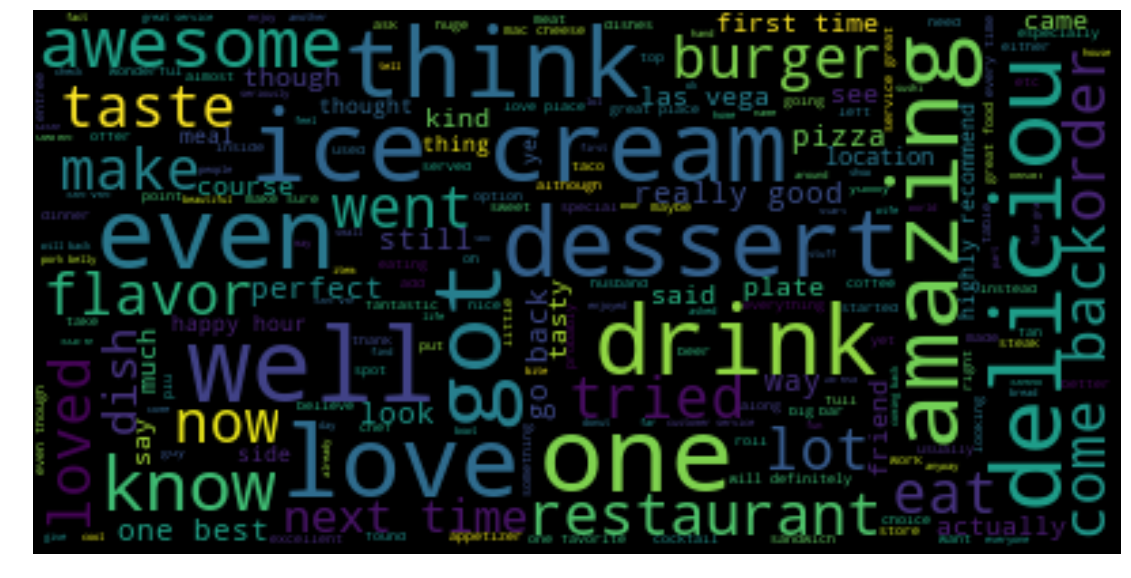

In [38]:
# 'collocations = False ' means that it will get rid of words that are frequently grouped together
# like 'oh oh' or 'beautiful place'. Otherwise you might have words that appear several times
# collocations = False' is an attribute that goes inside WordCloud(_____).generate(text)

wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize = (20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Some of the more common words & phrases outside of basic adjectives were: "ice cream", "dessert", "burger". If we were to design our own menu based off these reviews, we would definitely want to include these items.

## Data Analysis

In [39]:
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [40]:
vc = df_Final_BusinessID2['city'].value_counts()
u  = [i not in set(vc[vc==2].index) for i in df_Final_BusinessID2['city']]
df_Final_BusinessID2 = df_Final_BusinessID2[u]
df_Final_BusinessID2.head()

,business_id,city,state,latitude,longitude,name,review_count
0,--9e1ONYQuAa-CB_Rrw7Tw,Las Vegas,NV,36.123183,-115.169190,"""Delmonico Steakhouse""",1451
1,--cZ6Hhc9F7VkKXxHMVZSQ,Charlotte,NC,35.199853,-80.844820,"""Pio Pio""",317
2,-050d_XIor1NpCuWkbIVaQ,Phoenix,AZ,33.456696,-112.072327,"""Matt's Big Breakfast""",700
3,-1VaIJza42Hjev6ukacCNg,El Mirage,AZ,33.617436,-112.324297,"""Rio Mirage Cafe Y Cantina""",176
4,-1xuC540Nycht_iWFeJ-dw,Montréal,QC,45.519310,-73.580749,"""Romados""",433


In [41]:
df_City = pd.DataFrame(df_Final_BusinessID2.city.value_counts().reset_index())
df_City.columns = ['city', 'count']
df_City.head()

,city,count
0,Las Vegas,1539
1,Phoenix,854
2,Toronto,780
3,Charlotte,443
4,Scottsdale,443


In [42]:
df_City.to_csv('cities.csv', sep='\t')

We wanted to get the population data for all the cities that we could find that were relevant to our yelp data. Unfortunately, we couldn't just get the population data for only the cities included, so we had to try to get all the city population data that we could for the U.S., UK, and Canada.

The population data was split into 3 different CSVs for each country. To simplify things, we just manually merged them together on Excel.

In [43]:
## This CSV included all the cities of the data that we could find.

df_Pop = pd.read_csv('mergedPop.csv', encoding="ISO-8859-1")
df_Pop.head()

,Name,2018 Population
0,Toronto,2600000
1,Montreal,1600000
2,Calgary,1019942
3,Ottawa,812129
4,Edmonton,712391


In [44]:
df_Pop.columns = ['city', 'population']

In [45]:
# Get the city string from ("Phoenix City" -> "Phoenix)
df_Pop['city'] = df_Pop['city'].apply(lambda x: x.rsplit(' ',1)[0])

In [46]:
# Merge the population dataframe and city dataframe
df_FinalPop = pd.merge(df_City, df_Pop, on = 'city', how = 'outer')
df_FinalPop = df_FinalPop.dropna(axis=0, how='any')
df_FinalPop.head()

,city,count,population
0,Las Vegas,1539.0,632912.0
1,Las Vegas,1539.0,13285.0
2,Phoenix,854.0,1615017.0
3,Phoenix,854.0,1947.0
4,Phoenix,854.0,2281.0


In [47]:
## Convert population to a float for data analysis
df_FinalPop['population'] = [float(num) for num in df_FinalPop['population']]

In [48]:
## Re-order all cities by population ascending
df_FinalPop = df_FinalPop.groupby('population', as_index=False).max()

## Since we had several cities with the same name in multiple states, we decided to just keep the biggest population
df_FinalPop = df_FinalPop.drop_duplicates(subset='city', keep="last")

df_FinalPop.reset_index(drop = True, inplace = True)
df_FinalPop.head()



,population,city,count
0,52.0,Sun City,4.0
1,182.0,Thornhill,13.0
2,552.0,Cecil,1.0
3,860.0,Woodmere,5.0
4,1002.0,North Randall,1.0


In [49]:
## Running OLS square to get correlation
outcome, predictors = patsy.dmatrices('count ~ population', df_FinalPop)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     100.7
Date:                Thu, 22 Mar 2018   Prob (F-statistic):           1.17e-18
Time:                        14:47:15   Log-Likelihood:                -1008.9
No. Observations:                 161   AIC:                             2022.
Df Residuals:                     159   BIC:                             2028.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6220     10.874      0.425      0.6

Since P|t| is smaller than the general alpha value of .05, we can say that this is statistically significant.
What this means is that population is a good indicator of how many 5-star restaurants are within each city.

## Ethics and Privacy

The data we are using come from Kaggle.com which is a platform used by statisticians and data miners for predictive modeling and analytics competitions. The dataset is public and anyone with access to the website is able to use it. There should not be any biases since the dataset was not created by anyone who was a part of the data (in this case a part of any restaurant or other yelp businesses). Since we are researching data about restaurants which already have their information public, there should not be much concerns about privacy violations in the dataset we are using.  

## Conclusion

Interestingly enough we found that 5 star restaurants were open for shorter periods of time (around 10 hours or less) than other restaurants, and 4 star and lower restaurants, especially 1 stars, were open for 10 hours or more. It’s possible that the 5 star restaurants are so prestigious that they need less hours to be as successful, or that people desire to eat at these establishments because they have a shorter window of time to experience them.

From the word cloud, certain foods and categories were high in use. Tangible items like “dessert,” “drinks,” “ice-cream,” “burger” were blatantly obvious, along with opinionated and descriptive words such as “delicious,” “amazing,” “happy hour,” and “amazing.” So when opening an establishment it seems essential to have an amazing dessert menu, with delicious drinks and treats in order to bolster your chances at becoming a 5 star.

From our data Analysis
We are able to say that population is a good indicator of how many 5-star restaurants there are, so if we were to open up our own restaurant, we would most likely want to open it in a very populated city vs a small town.


## Limitations/Complications

One thing we changed early on was our inclusion of the tip data. There was some conflict when attempting to use both tips and reviews, so we decided that a full review was better suited to our purposes than just tips. Therefore the tip csv was not used.

We also wanted to check some other potential correlations such as income + number of immigrants to see if they were a good predictor of how many 5-star restaurants there would be, but we were unable to get that data. There were too many inconsistencies with the formats of the data. 